# NASA ABoVE Lakes Analysis #6: Climate Drivers

#### Author: Catherine Kuhn

Purpose: Analyzes time series of greenness to test for correlation with other climate variables. 
Climate variables: 
- Pacific Decadal Oscillation (PDO) Anomalies
- Arctic Oscillation (AO) Anomalies

Future variables I would like to include: 
- Peak July air temperature
- Spring temperature
- Precipitation (Spring, Summer)
- Winter Temperature


https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

In [1]:
# This notebook was built in Catherine's root environment. (Sorry Don!) 
import pandas as pd
#from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
%matplotlib inline

## Read in the data

In [3]:
# Landsat 8 
# %cd /Users/ckuhn/Downloads/GEE_Exports/NASA_ABOVE_7/
# raw = pd.read_csv('above_centroids.csv')
# raw = raw.loc[raw['B2_median']>0]
# filtered = pd.read_csv('above_centroids_filtered_v7.csv')
# filtered = filtered.loc[filtered['B2_median']>0]

# # Landsat 7 
# %cd /Users/ckuhn/Downloads/Landsat_7/processed/
# #raw = pd.read_csv('l7_above_centroids_raw.csv')
# filtered = pd.read_csv('l7_above_centroids_filtered.csv')

# %cd /Users/ckuhn/Downloads/Landsat_5/processed/
# raw = pd.read_csv('l5_above_centroids_raw.csv')
# raw = raw.loc[raw['B2_median']>0]

# filtered = pd.read_csv('l5_above_centroids_filtered_v7.csv')
# filtered = filtered.loc[filtered['B2_median']>0]

# Merged Landsat trends
%cd /Users/ckuhn/Downloads/giant_victory_if_works/
filtered = pd.read_csv('landsat_above_centroids_filtered_merged_all_sensorsl8h.csv')


/Users/ckuhn/Downloads/giant_victory_if_works


In [4]:
selected_df = filtered #.loc[filtered['year']>=1998]
# selected_df = selected_df.loc[selected_df['numObserv_mean']>0].copy()
# selected_df = selected_df.loc[selected_df['B7_median']<1.6].copy()
# selected_df = selected_df.loc[selected_df['B2_median']<2].copy()

In [5]:
dataset = 'lall_above_centroids_filtered'
lake_id = 'Hylak_id'
lake_area = 'Lake_area'

In [6]:
len(selected_df)

13752342

In [7]:
selected_df['B2_median'].mean()

0.04306297071255218

# Exploratory Data Analysis

In [8]:
#print(raw['B2_median'].mean()), print(raw['B2_median'].median())
print(filtered['B2_median'].mean()), print(filtered['B2_median'].median())

0.04306297071255218
0.0322


(None, None)

# Teleconnections

Import PDO and AO trends and anomalies. The anomaly is calculated for every month; extract to the year. 

In [9]:
%cd /Users/ckuhn/Documents/ABOVE/Data/Climate/
osc = pd.read_csv('climate_oscillations.csv', dtype = object)
osc['year'] =  pd.to_numeric(osc["year"])       
osc['ao_anomaly'] =  pd.to_numeric(osc["ao_anomaly"])  
osc['ao_mean'] =  pd.to_numeric(osc["ao_mean"])       
osc['pdo_mean'] =  pd.to_numeric(osc["pdo_mean"])       
osc['pdo_anomaly'] =  pd.to_numeric(osc["pdo_anomaly"])     
#osc['Year'] = osc['year'].round(0)
osc['Year'] = osc.year.apply(lambda x: int(x))

osc = osc.sort_values(by='year')

### TO DO 
# Add in month = 
#osc['Month'] ==
### TO DO 

print(len(osc))
osc.tail(2)

/Users/ckuhn/Documents/ABOVE/Data/Climate
432


,year,pdo_mean,pdo_anomaly,ao_mean,ao_anomaly,Year
430,2019.833333,NaN,NaN,NaN,NaN,2019
431,2019.916667,NaN,NaN,NaN,NaN,2019


/Users/ckuhn/Documents/ABOVE/Figures/Oscillations


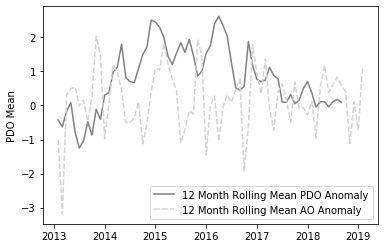

In [10]:
small = osc.loc[osc['year']>2013]
plt.plot('year', 'pdo_mean', color='grey', data = small, label='12 Month Rolling Mean PDO Anomaly')
plt.plot('year', 'ao_mean', color='lightgrey', ls='--', data = small, label='12 Month Rolling Mean AO Anomaly')

plt.legend()
plt.ylabel('PDO Mean')

%cd /Users/ckuhn/Documents/ABOVE/Figures/Oscillations/
plt.savefig('oscillations.png', dpi=300)
plt.show()

In [30]:
anomalies = osc.groupby(['Year'])['pdo_anomaly', 'ao_anomaly'].mean().reset_index()
year_data = selected_df.groupby('year')['B2_median'].mean().reset_index()

joined_df_summed_by_year = pd.merge(year_data, anomalies[['Year','pdo_anomaly', 'ao_anomaly']], how='left', left_on='year', right_on='Year')

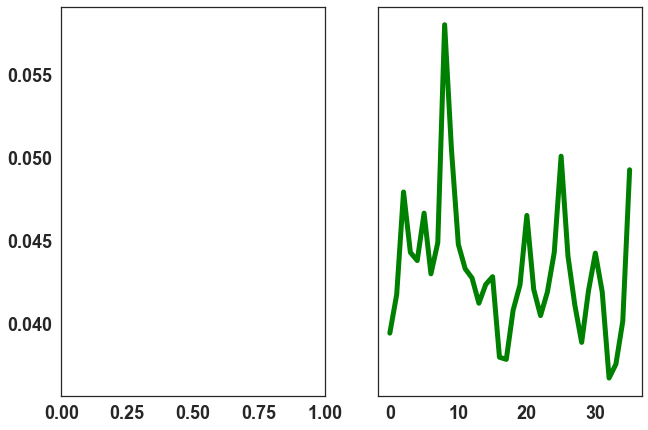

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row')
ax2 = joined_df_summed_by_year['B2_median'].plot(color='green', lw =5, label='Green')

TypeError: 'AxesSubplot' object is not iterable

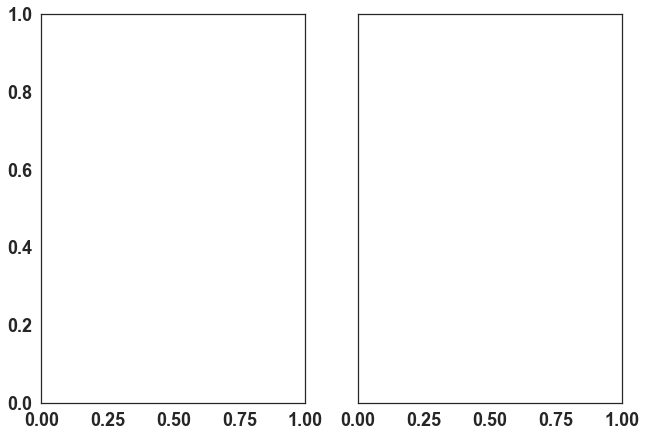

In [33]:
sns.set_context("paper")

def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Arial", size = 18)
    plt.rc('xtick', labelsize=18) 
    plt.rc('ytick', labelsize=18) 
set_style()  
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams["font.weight"] = "bold"

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(1, 2, sharex='col', sharey='row')



ax2 = joined_df_summed_by_year['pdo_anomaly'].plot(color='grey', ls='--', alpha = 0.6, secondary_y=True, label='PDO')
ax2 = joined_df_summed_by_year['ao_anomaly'].plot(color='lightgrey', alpha = 0.6, ls='--',  secondary_y=True, label='AO')

ax1 = joined_df_summed_by_year['B2_median'].plot(color='green', lw =5, label='Green')
ax1.legend(fontsize=22)
ax1.set_ylabel('Green(560 nm)', fontsize=22)
ax2.set_ylabel('Anomaly', fontsize=22)

#labels = ['x', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
# labels = joined_df_summed_by_year['year']
# x_ticks_labels = labels;
# ax1.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18);

# ax2.set_xlabel('')
# ax1.set_xlabel('')
#plt.legend(fontsize=22)

# %cd /Users/ckuhn/Documents/ABOVE/Figures/Oscillations/
# plt.savefig(dataset + 'summary_oscillations_simple_line_plot.png', dpi=300)
# plt.show()

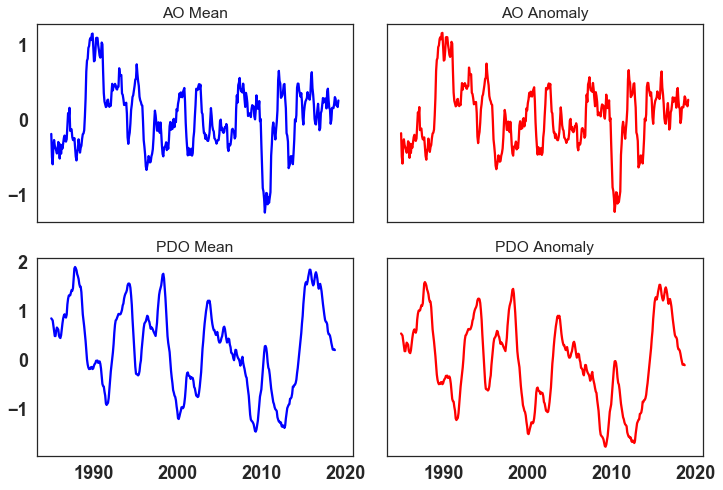

/Users/ckuhn/Documents/ABOVE/Figures/Oscillations


<Figure size 748.8x514.8 with 0 Axes>

In [16]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

ax1.plot(osc['year'], osc['ao_mean'].rolling(12).mean(), color='blue')
ax1.set_title('AO Mean')
ax2.plot(osc['year'], osc['ao_anomaly'].rolling(12).mean(), color='red')
ax2.set_title('AO Anomaly')
ax3.plot(osc['year'], osc['pdo_mean'].rolling(12).mean(), color='blue')
ax3.set_title('PDO Mean')
ax4.plot(osc['year'], osc['pdo_anomaly'].rolling(12).mean(), color='red')
ax4.set_title('PDO Anomaly')

plt.tight_layout()
plt.show()

%cd /Users/ckuhn/Documents/ABOVE/Figures/Oscillations/
plt.savefig('oscillations_four_panel', dpi=300)
plt.show()

/Users/ckuhn/anaconda2/envs/vectorenv/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in greater_equal
/Users/ckuhn/anaconda2/envs/vectorenv/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in less_equal


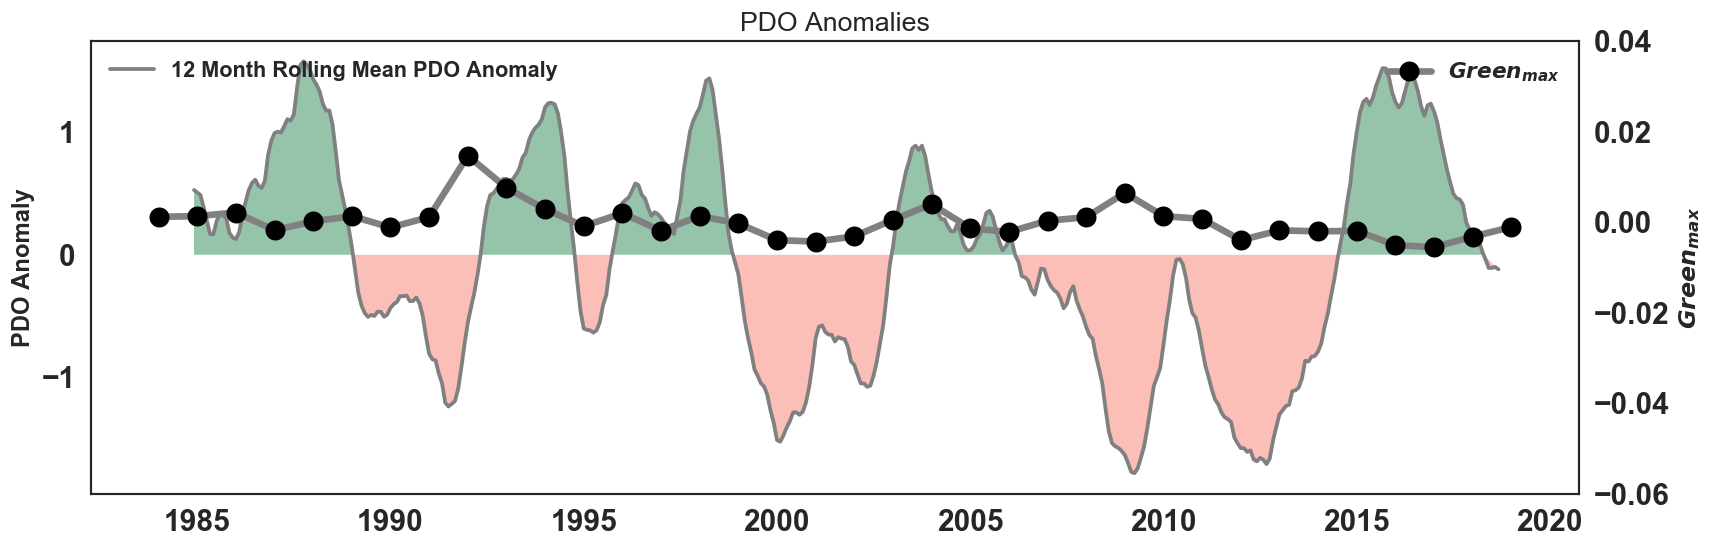

/Users/ckuhn/Documents/ABOVE/Figures/Oscillations


<Figure size 748.8x514.8 with 0 Axes>

In [17]:
# Need to do this by lake 
selected_df['B2_median_anomaly'] = selected_df['B2_median'] - selected_df['B2_median'].median()

x1 = osc['year'].values
y1 = osc['pdo_anomaly'].rolling(12).mean().values

green = selected_df.groupby('year', as_index=False)['B2_median_anomaly'].median()
x2 = green['year']
y2 = green['B2_median_anomaly'].rolling(1).mean().values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x1, y1, where=y1 >= 0, alpha=0.5,facecolor='seagreen', interpolate=True)
plt.fill_between(x1, y1,  where=y1 <= 0,alpha=0.5, facecolor='salmon', interpolate=True)
plt.plot(x1, y1, color='grey', label='12 Month Rolling Mean PDO Anomaly')
plt.legend(loc='upper left')
plt.ylabel('PDO Anomaly')
# # Add counts in the background
ax2 = plt.twinx()
ax2.set_ylabel('')

ax2.plot(x2,y2, marker='o', markerfacecolor='black',markeredgecolor='black', markersize=12, color='grey', linewidth=4, label='$Green_{max}$')
ax2.set_ylim(-0.06,0.04)
#ax2.set_ylim(-0.03,0.1) #carbbas

ax2.legend(loc='upper right')
ax2.set_ylabel('$Green_{max}$')
plt.title('PDO Anomalies', fontsize=16)
# plt.hlines(y=0, xmin=np.min(osc.year), xmax=np.max(osc.year), linewidth=.5)

plt.show()


# Relatively strong, negative
# PDO phases from 1988–1991 and 1998–2002 coincided
# with prolonged regional droughts indicated by a
# standardized moisture stress index.

%cd /Users/ckuhn/Documents/ABOVE/Figures/Oscillations/
plt.savefig(dataset + '_time_series_PDO_anomalies_with_green.png', dpi=300)
plt.show()

/Users/ckuhn/anaconda2/envs/vectorenv/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in greater_equal
/Users/ckuhn/anaconda2/envs/vectorenv/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in less_equal


/Users/ckuhn/Documents/ABOVE/Figures/Oscillations


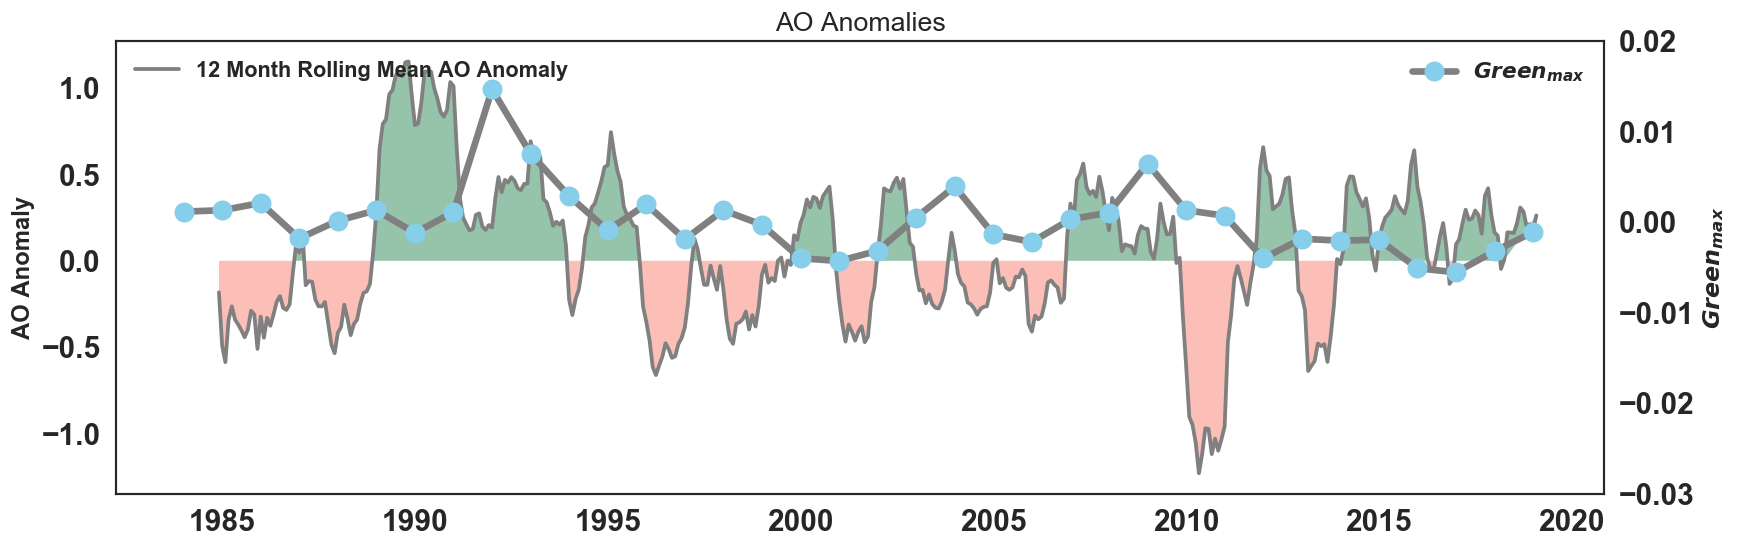

In [18]:
x1 = osc['year'].values
y1 = osc['ao_anomaly'].rolling(12).mean().values

green = selected_df.groupby('year', as_index=False)['B2_median_anomaly'].median()
x2 = green['year']
y2 = green['B2_median_anomaly'].rolling(1).mean().values


# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x1, y1, where=y1 >= 0, alpha=0.5,facecolor='seagreen', interpolate=True)
plt.fill_between(x1, y1,  where=y1 <= 0,alpha=0.5, facecolor='salmon', interpolate=True)
plt.plot(x1, y1, color='grey', label='12 Month Rolling Mean AO Anomaly')
plt.legend(loc='upper left')
plt.ylabel('AO Anomaly')
# # Add counts in the background
ax2 = plt.twinx()
ax2.set_ylabel('')

ax2.plot(x2,y2, marker='o', markerfacecolor='skyblue',markeredgecolor='black', markersize=12, color='grey', linewidth=4, label='$Green_{max}$')
ax2.set_ylim(-0.03,0.02)
#ax2.set_ylim(-0.015,0.04)

ax2.legend(loc='upper right')
ax2.set_ylabel('$Green_{max}$')
plt.title('AO Anomalies', fontsize=16)
# plt.hlines(y=0, xmin=np.min(osc.year), xmax=np.max(osc.year), linewidth=.5)

%cd /Users/ckuhn/Documents/ABOVE/Figures/Oscillations/
plt.savefig(dataset + '_time_series_AO_anomalies_with_green.png', dpi=300)

plt.show()

In [19]:
# Don't know what this is. Maybe garbage? 
# green['B2_median_anomaly'].diff().plot(figsize=(20,10), linewidth=5, fontsize=20, color='black')
# green['B2_median_anomaly'].plot(figsize=(5,2.5), linewidth=5, fontsize=20, color='pink', alpha=0.4)
# osc['pdo_anomaly'].diff().plot(figsize=(5,2.5), linewidth=5, fontsize=20, color='pink', alpha=0.4)
# osc['pdo_anomaly'].plot(figsize=(5,2.5), linewidth=5, fontsize=20, color='black', alpha=0.4)

# Inspired by this:
https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

This is the correlation before and after detrending the dataset

In [22]:
# osc_df['only_year'] = osc.year.apply(lambda x: int(x)).copy()
# osc_df = osc_df.loc[osc_df['only_year']>2013].copy()
#osc_df = osc_df.groupby(['only_year'])['ao_anomaly'].median().reset_index()
#osc['only_year'] = osc.year.apply(lambda x: int(x))

osc_df_subset = osc.loc[osc['year']>=1984].copy()
#osc_df_subset['only_year'] = osc_df_subset.year.apply(lambda x: int(x))

green_df = selected_df.groupby(['year'])['B2_median'].median().reset_index()
osc_df = osc_df_subset.groupby(['Year'])[['ao_anomaly', 'pdo_anomaly']].median().reset_index()

df_ao = pd.DataFrame()
df_ao['ao'] = osc_df['ao_anomaly']
df_ao['b2'] = green_df['B2_median']

          ao        b2
ao  1.000000 -0.271796
b2 -0.271796  1.000000
Detrended           ao        b2
ao  1.000000 -0.364748
b2 -0.364748  1.000000
          pdo        b2
pdo  1.000000  0.173239
b2   0.173239  1.000000
Detrended           pdo        b2
pdo  1.000000  0.305285
b2   0.305285  1.000000


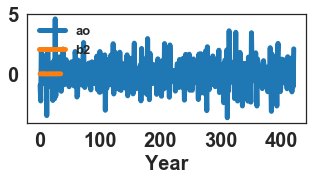

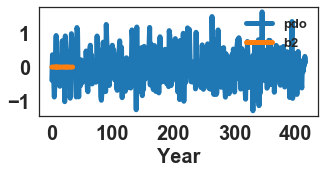

In [23]:
osc_df_subset = osc.loc[osc['Year']>1984].copy()

green_df = selected_df.groupby(['year'])['B2_median'].median().reset_index()
osc_df_subset = osc_df_subset.groupby(['Year'])[['ao_anomaly', 'pdo_anomaly']].median().reset_index()

df_ao = pd.DataFrame()
df_ao['ao'] = osc['ao_anomaly']
df_ao['b2'] = green_df['B2_median']
print(df_ao.corr())
print('Detrended', df_ao.diff().corr())

df_ao.diff().plot(figsize=(5,2), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

df_pdo = pd.DataFrame()
df_pdo['pdo'] = osc['pdo_anomaly']
df_pdo['b2'] = green_df['B2_median']
print(df_pdo.corr())
print('Detrended', df_pdo.diff().corr())

df_pdo.diff().plot(figsize=(5,2), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

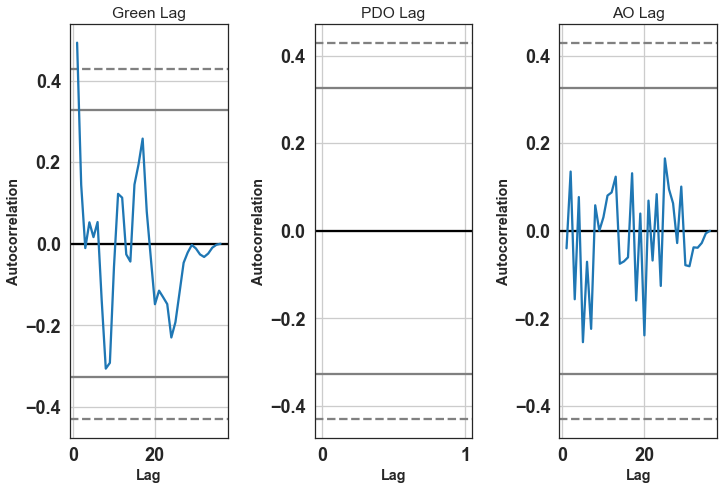

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

pd.plotting.autocorrelation_plot(df_pdo['b2'].dropna(), ax=ax1);
ax1.set_title('Green Lag');

pd.plotting.autocorrelation_plot(anomalies['pdo_anomaly'], ax=ax2);
ax2.set_title('PDO Lag');

pd.plotting.autocorrelation_plot(osc_df['ao_anomaly'], ax=ax3);
ax3.set_title('AO Lag');

plt.tight_layout()

# T-Tests Between Positive and Negative Phases

In [19]:
#joined_df_raw = pd.merge(raw, anomalies[['Year','pdo_anomaly', 'ao_anomaly']], how='left', left_on='year', right_on='Year')
joined_df_filtered = pd.merge(filtered, anomalies[['Year','pdo_anomaly', 'ao_anomaly']], how='left', left_on='year', right_on='Year')

In [20]:
# Choose which dataset to analyze
joined_df = joined_df_filtered
dataset_name = 'Filtered'

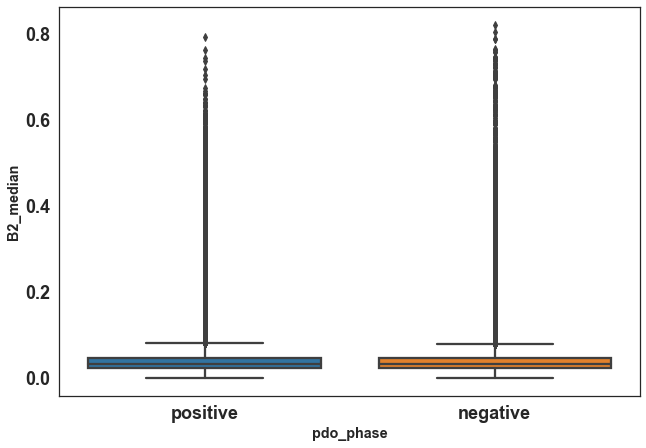

In [37]:
pos_pdo = joined_df.loc[joined_df['pdo_anomaly']>0].copy()
neg_pdo = joined_df.loc[joined_df['pdo_anomaly']<0].copy()
pos_pdo['pdo_phase'] = 'positive'
neg_pdo['pdo_phase'] = 'negative'
joined_df_pdo = pos_pdo.append(neg_pdo)

g = sns.boxplot(x="pdo_phase", y="B2_median", data = joined_df_pdo)
g

# %cd /Users/ckuhn/Documents/ABOVE/Figures/Oscillations/
# plt.savefig(dataset + '_boxplot_pdo_phases.png', dpi=300)

plt.show()

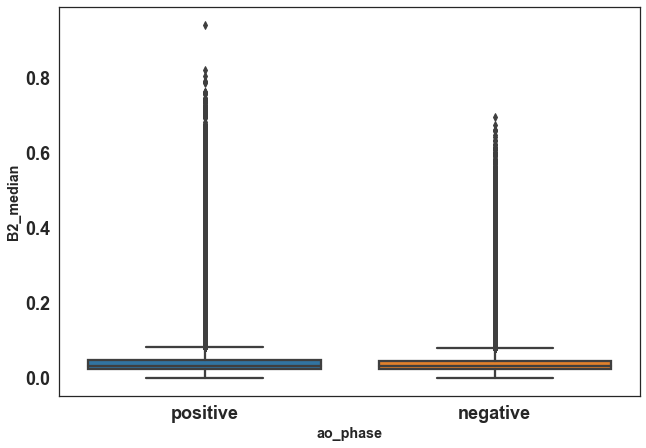

In [38]:
pos_ao = joined_df.loc[joined_df['ao_anomaly']>=0].copy()
neg_ao = joined_df.loc[joined_df['ao_anomaly']<0].copy()
pos_ao['ao_phase'] = 'positive'
neg_ao['ao_phase'] = 'negative'
joined_df_ao = pos_ao.append(neg_ao)
g = sns.boxplot(x="ao_phase", y="B2_median", data = joined_df_ao)
g

# %cd /Users/ckuhn/Documents/ABOVE/Figures/Oscillations/
# plt.savefig(dataset + '_boxplot_ao_phases.png', dpi=300)

plt.show()

# The two phases are signficantly different from each other

#### Do a t-test here to see if the groups are different

In [39]:
pos_ao_inputs = pos_ao['B2_median'].values
neg_ao_inputs = neg_ao['B2_median'].values

pos_pdo_inputs = pos_pdo['B2_median'].values
neg_pdo_inputs = neg_pdo['B2_median'].values

In [41]:
print(dataset_name)
print('AO T-Test')
print('Pos AO mean', pos_ao_inputs.mean())
print('Neg AO mean', neg_ao_inputs.mean())
t2, p2 = stats.ttest_ind(pos_ao_inputs,neg_ao_inputs)
print("t = " + str(t2))
print("p = " + str(p2))

print('PDO T-Test')
print('Pos PDO mean', pos_pdo_inputs.mean())
print('Neg PDO mean', neg_pdo_inputs.mean())
t2, p2 = stats.ttest_ind(pos_pdo_inputs,neg_pdo_inputs)
print("t = " + str(t2))
print("p = " + str(p2))

Filtered
AO T-Test
Pos AO mean 0.04379774290776242
Neg AO mean 0.04211672200843367
t = 87.87075283792265
p = 0.0
PDO T-Test
Pos PDO mean 0.04344934608123926
Neg PDO mean 0.04238473226003097
t = 56.41534847631639
p = 0.0


# Lakes On Aggregate

Three tests:
- **Kendall's tau:** determines correlation between two time series
- **Mann Kendall Slope Test:** determines if change in slope is significant
- **Thiel Sen Slope:** just a way to calculate the slope of a trend line

### Kendall's Tau to Determine if Two Series are Correlated

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.kendalltau.html
Values close to 1 indicate strong agreement, values close to -1 indicate strong disagreement. 

In [29]:
# def calculate_anomaly(df):
#     lakes = []
#     b2_anomalies = []
#     lake_ids = df[lake_id].unique()
    
#     for lake in lake_ids:
#         one_lake = df.loc[df[lake_id]==lake]
#         green = one_lake['B2_median']
#         green_median = one_lake['B2_median'].median()
#         anomaly = green - green_median 
#         b2_anomalies.append(anomaly)
#         lakes.append(lake)
#         #lats.append(lat)
#         #longs.append(long)
#     lake_data = {}  
#     lake_data['lake'] = lakes
#     lake_data['B2_anomaly'] = b2_anomalies
#     #lake_data['Lat'] = lats
#     #lake_data['Long'] = longs

#     return pd.DataFrame.from_dict(lake_data)

In [30]:
#calculate_anomaly(raw)

In [31]:
# Make dataset that is the three variables of interest grouped by year
#tau_df_inputs = joined_df_raw.groupby('year')[['B2_median_anomaly', 'B2_median', 'pdo_anomaly', 'ao_anomaly']].mean().reset_index().copy()
tau_df_inputs = joined_df_filtered.groupby('year')[['B2_median_anomaly', 'B2_median', 'pdo_anomaly', 'ao_anomaly']].mean().reset_index().copy()

In [32]:
# Arctic Oscillation
tau_df_inputs = tau_df_inputs.dropna()
ao_x1 = tau_df_inputs['B2_median']
ao_x2 = tau_df_inputs['ao_anomaly']
ao_tau, ao_p_value = stats.kendalltau(ao_x1, ao_x2)

print('Kendalls Tau for AO + Green')
print('Tau:', ao_tau)
print('p-value:', ao_p_value)
print('not significant')

# Pacific Oscillation
pdo_x1 = tau_df_inputs['B2_median']
pdo_x2 = tau_df_inputs['pdo_anomaly']

pdo_tau, pdo_p_value = stats.kendalltau(pdo_x1, pdo_x2)
print('Kendalls Tau for PDO + Green')
print('Tau:', pdo_tau)
print('p-value:', pdo_p_value)
print('not significant')

Kendalls Tau for AO + Green
Tau: 0.038655462184873944
p-value: 0.7439455285232186
not significant
Kendalls Tau for PDO + Green
Tau: 0.07226890756302522
p-value: 0.5414236472276196
not significant


# Calculate Kendall's Tau Per Lake

In [33]:
# Mock dataframe to use to test function
lake_list = joined_df['Hylak_id'].head(7).values
lake_list
special_lakes = joined_df.loc[joined_df['Hylak_id'].isin(lake_list)]
special_lakes.columns

Index(['Unnamed: 0', 'Hylak_id', 'year', 'B2_median', 'B2_median_anomaly',
       'Year', 'pdo_anomaly', 'ao_anomaly'],
      dtype='object')

In [34]:
def calculate_tau(df):
    lakes = []
    pdo_taus = []
    pdo_pvalues = []
    ao_taus = []
    ao_pvalues = []
    lake_ids = df[lake_id].unique()
    
    for lake in lake_ids:
        one_lake = df.loc[df[lake_id]==lake]
        one_lake = one_lake.sort_values(by='Year')
        one_lake = one_lake.dropna()

        x1 = one_lake['B2_median']
        x2 = one_lake['pdo_anomaly']
        x3 = one_lake['ao_anomaly']
        
        pdo_tau, pdo_p_value = stats.kendalltau(x1, x2)
        pdo_taus.append(pdo_tau)
        pdo_pvalues.append(pdo_p_value)
        
        ao_tau, ao_p_value = stats.kendalltau(x1, x3)
        ao_taus.append(ao_tau)
        ao_pvalues.append(ao_p_value)
        lakes.append(lake)
        #lats.append(lat)
        #longs.append(long)
    lake_data = {}  
    lake_data['lake'] = lakes
    lake_data['PDO Kendalls_Tau'] = pdo_taus
    lake_data['PDO Trend Significance'] = pdo_pvalues
    lake_data['AO Kendalls_Tau'] = ao_taus
    lake_data['AO Trend Significance'] = ao_pvalues
    #lake_data['Lat'] = lats
    #lake_data['Long'] = longs

    return pd.DataFrame.from_dict(lake_data)

In [ ]:
# # Calculate tau for the raw dataset
# year_counts = joined_df_raw.groupby([lake_id])['year'].nunique().reset_index()        
# consistent = year_counts.loc[year_counts['year']>= 4]
# lakes_to_keep = consistent['Hylak_id'].unique()
# filter_years = joined_df['Hylak_id'].isin(lakes_to_keep)
# raw_keep = joined_df.loc[(filter_years)]

# kendalls_tau_results = calculate_tau(raw_keep)
# kendalls_tau_results.head(2)

In [ ]:
joined_df_filtered.head(2)

In [ ]:
kendalls_tau_results_filtered = calculate_tau(joined_df_filtered)

In [ ]:
#%cd /Users/ckuhn/Downloads/GEE_Exports/NASA_ABOVE_7/Landsat_8/processed/
%cd /Users/ckuhn/Downloads/Landsat_7/processed/
#%cd /Users/ckuhn/Downloads/Landsat_5/processed/

%cd /Users/ckuhn/Downloads/giant_victory_if_works/
kendalls_tau_results_filtered.to_csv('LALL_above_centroids_filtered_kendalls_tau_results.csv')

In [ ]:
print("AO Tau Significance")
# sig_results = kendalls_tau_results.loc[kendalls_tau_results['AO Trend Significance']<0.05]
# print(len(sig_results))
# print(len(sig_results)/len(kendalls_tau_results))

sig_results = kendalls_tau_results_filtered.loc[kendalls_tau_results_filtered['AO Trend Significance']<0.05]
print(len(sig_results))
print(len(sig_results)/len(kendalls_tau_results_filtered))

# print('')
print("PDO Tau Significance")
# sig_results = kendalls_tau_results.loc[kendalls_tau_results['PDO Trend Significance']<0.05]
# print(len(sig_results))
# print(len(sig_results)/len(kendalls_tau_results))

sig_results = kendalls_tau_results_filtered.loc[kendalls_tau_results_filtered['PDO Trend Significance']<0.05]
print(len(sig_results))
print(len(sig_results)/len(kendalls_tau_results_filtered))

In [ ]:
#print(kendalls_tau_results['AO Trend Significance'].mean())
print(kendalls_tau_results_filtered['AO Trend Significance'].mean())

# Mann Kendall Test Analysis

In [ ]:
#https://michaelpaulschramm.com/2015/08/01/simple-time-series-trend-analysis/

#import urllib2  
import datetime as datetime  
import pandas as pd  
import statsmodels.api as sm  
import seaborn as sns  
import matplotlib.pyplot as plt

import numpy as np  
from scipy.stats import norm, mstats


def mk_test(x, alpha = 0.05):  
    """   
    Input:
        x:   a vector of data
        alpha: significance level (0.05 default)

    Output:
        trend: tells the trend (increasing, decreasing or no trend)
        h: True (if trend is present) or False (if trend is absence)
        p: p value of the significance test
        z: normalized test statistics 

    Examples
    --------
      >>> x = np.random.rand(100)
      >>> trend,h,p,z = mk_test(x,0.05) 
    """
    n = len(x)

    # calculate S 
    s = 0
    for k in range(n-1):
        for j in range(k+1,n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x = np.unique(x)
    g = len(unique_x)

    # calculate the var(s)
    if n == g: # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else: # there are some ties in data
        tp = np.zeros(unique_x.shape)
        for i in range(len(unique_x)):
            tp[i] = sum(unique_x[i] == x)
        var_s = (n*(n-1)*(2*n+5) + np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s>0:
        z = (s - 1)/np.sqrt(var_s)
    elif s == 0:
            z = 0
    elif s<0:
        z = (s + 1)/np.sqrt(var_s)

    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z))) # two tail test
    h = abs(z) > norm.ppf(1-alpha/2) 

    if (z<0) and h:
        trend = 'sig. decreasing'
    elif (z>0) and h:
        trend = 'sig. increasing'
    else:
        trend = 'no sig. trend'

    return trend, h, p, z

# Original Plot

In [ ]:
plt.figure(figsize=(12,5))

green_raw = max_green.groupby('year', as_index=False)['B2_median'].median()
plt.plot( 'year', 'B2_median', data=green_raw, marker='o', markerfacecolor='lightgrey', markersize=5, color='grey', linewidth=4, label='Max Green')
plt.tick_params(axis='y', colors='#8e9431') #**tkw
plt.ylabel('Peak Annual Greenness', color='#8e9431')
plt.legend(loc='upper left')
plt.ylim(0,0.4)


ax2 = plt.twinx()
green_filtered= median_green.groupby('year', as_index=False)['B2_median'].median()
ax2.plot( 'year', 'B2_median', data=green_filtered, marker='o', markerfacecolor='#566727', markersize=5, color='#8e9431', linewidth=3,label='Median Green' )
plt.ylabel('Peak Annual Green Band', color='#566727')
ax2.set_ylim(0,0.4)
ax2.tick_params(axis='y', colors='#566727')

plt.title('Peak Annual Trends in Greenness for Permanent Water NHD Lakes in the YF')

plt.axvline(2012, color='grey', ls='--', label = 'Landsat 5 end')
plt.axvline(1999, color='grey', ls='-.', label = 'Landsat 7 start')
plt.axvline(2013, color='grey', ls=':', label = 'Landsat 8 start')
plt.legend(loc='upper right')

plt.show()
%cd /Users/ckuhn/Documents/ABOVE/Figures/
# plt.savefig('NDVI_L8.png', dpi= 300)


# Relatively strong, negative
# PDO phases from 1988–1991 and 1998–2002 coincided
# with prolonged regional droughts indicated by a
# standardized moisture stress index.